In [100]:
# Dependencies and Setup
# import geopandas as gpd
import pandas as pd
import numpy as np
import requests
import gmaps
import os
import matplotlib.pyplot as plt
# from mpl_toolkits.axes_grid1 import make_axes_locatable
# import plotly.graph_objects as go


# Import API key
from api_key import g_key

In [104]:
#Call 2021 Property sales stats
Stat_21 = pd.read_csv('Resources/yearly_data_clean_2021.csv',encoding='cp1252')
Stat_21.head()

,Postcode,Suburb,ID_Domain,medianSoldPrice,numberSold,highestSoldPrice,lowestSoldPrice,5thPercentileSoldPrice,25thPercentileSoldPrice,75thPercentileSoldPrice,...,medianSaleListingPrice,numberSaleListing,highestSaleListingPrice,lowestSaleListingPrice,auctionNumberAuctioned,auctionNumberSold,medianRentListingPrice,numberRentListing,highestRentListingPrice,lowestRentListingPrice
0,3067,Abbotsford,627,1220000.0,75.0,2810000.0,735000.0,863000.0,1025000.0,1445000.0,...,1200000.0,89.0,2625000.0,499000.0,49.0,32.0,610.0,204.0,1300.0,320.0
1,3040,Aberfeldie,647,1360000.0,223.0,4000000.0,283000.0,545000.0,1000000.0,1811000.0,...,1250000.0,295.0,7000000.0,280000.0,147.0,92.0,495.0,419.0,1250.0,230.0
2,3042,Airport West,757,1050000.0,99.0,2870000.0,600000.0,710000.0,849000.0,1265000.0,...,965000.0,115.0,2900000.0,590000.0,65.0,40.0,500.0,135.0,1100.0,280.0
3,3021,Albanvale,787,613000.0,336.0,1550000.0,330000.0,450000.0,555000.0,685000.0,...,599000.0,506.0,1460000.0,55000.0,91.0,43.0,350.0,655.0,1593.0,170.0
4,3206,Albert Park,797,2680000.0,49.0,8600000.0,1235000.0,1525000.0,2250000.0,3575000.0,...,2600000.0,65.0,9750000.0,1300000.0,35.0,19.0,800.0,99.0,1900.0,330.0


In [109]:
# trim the shool dataframe and rename the columns
school_reduced=school_data[["Education_Sector","SCHOOL_NO","School_Name","School_Type","Address_Line_1","Address_Town","Address_Postcode","X","Y"]]
School_clean=school_reduced.rename(columns={"Education_Sector":"Education sector",
                                     "SCHOOL_NO":"School number",
                                     "School_Name":"Name",
                                     "School_Type":"Type",
                                     "Address_Line_1":"Address",
                                     "Address_Town":"Town/city",
                                     "Address_Postcode":"Postcode",
                                     "X":"Longitude",
                                     "Y":"Latitude",})
School_clean.head()


,Education sector,School number,Name,Type,Address,Town/city,Postcode,Longitude,Latitude
0,Government,1,Alberton Primary School,Primary,21 Thomson Street,Alberton,3971,146.666601,-38.617713
1,Government,3,Allansford and District Primary School,Primary,Frank Street,Allansford,3277,142.590393,-38.386281
2,Government,4,Avoca Primary School,Primary,118 Barnett Street,Avoca,3467,143.475649,-37.084502
3,Government,8,Avenel Primary School,Primary,40 Anderson Street,Avenel,3664,145.234722,-36.901368
4,Government,12,Warrandyte Primary School,Primary,5-11 Forbes Street,Warrandyte,3113,145.213980,-37.742675


In [110]:
# save the rename shool data frame to csv file
School_clean.to_csv('Resources/school list clean.csv',encoding='utf-8',index=False,header=True)


In [112]:
#merge shool list with 2021 Sales data, trim down the data
combined_df=pd.merge(School_clean,Stat_21,how="inner",on="Postcode")
combined_df=combined_df[["Education sector","School number","Name","Postcode","Longitude","Latitude","medianSoldPrice","numberSold"]]

combined_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2308 entries, 0 to 2307
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Education sector  2308 non-null   object 
 1   School number     2308 non-null   int64  
 2   Name              2308 non-null   object 
 3   Postcode          2308 non-null   int64  
 4   Longitude         2308 non-null   float64
 5   Latitude          2308 non-null   float64
 6   medianSoldPrice   2308 non-null   float64
 7   numberSold        2308 non-null   float64
dtypes: float64(4), int64(2), object(2)
memory usage: 162.3+ KB


In [114]:
# groupby the combined df by postcodes, calculate how many shools under each postcode
grouped_combined_df=combined_df.groupby(['Postcode'])
school_count=grouped_combined_df["Postcode"].count()
school_count

Postcode
3003      1
3008      1
3011     12
3012     15
3013      5
       ... 
3939      5
3941      4
3943      2
3976      6
3977    208
Name: Postcode, Length: 170, dtype: int64

In [71]:
# set the postcode and the shool count into a datafram and reset the index
school_count_df=pd.DataFrame(school_count)
school_count_df=school_count_df.rename(columns={"Postcode":"School count"})
school_count_df.reset_index()

,Postcode,School count
0,3003,1
1,3008,1
2,3011,12
3,3012,15
4,3013,5
...,...,...
165,3939,5
166,3941,4
167,3943,2
168,3976,6


In [117]:
# merge the two df together based on postcode
school_complete=pd.merge(school_count_df,combined_df,how="outer",on="Postcode")
school_complete['medianSoldPrice'] = school_compldte['medianSoldPrice'].fillna(0)
school_complete.head(10)

,Postcode,School count,Education sector,School number,Name,Longitude,Latitude,medianSoldPrice,numberSold
0,3003,1,Catholic,25,Simonds Catholic College,144.952883,-37.805971,1110000.0,43.0
1,3008,1,Government,5573,Docklands Primary School,144.940553,-37.812714,1278000.0,12.0
2,3011,12,Government,253,Footscray Primary School,144.892669,-37.798383,1061000.0,96.0
3,3011,12,Government,253,Footscray Primary School,144.892669,-37.798383,1061000.0,96.0
4,3011,12,Government,1912,Footscray City Primary School,144.900253,-37.806400,1061000.0,96.0
5,3011,12,Government,1912,Footscray City Primary School,144.900253,-37.806400,1061000.0,96.0
6,3011,12,Government,4160,Footscray North Primary School,144.883372,-37.787746,1061000.0,96.0
7,3011,12,Government,4160,Footscray North Primary School,144.883372,-37.787746,1061000.0,96.0
8,3011,12,Government,7842,Footscray High School,144.893763,-37.791043,1061000.0,96.0
9,3011,12,Government,7842,Footscray High School,144.893763,-37.791043,1061000.0,96.0


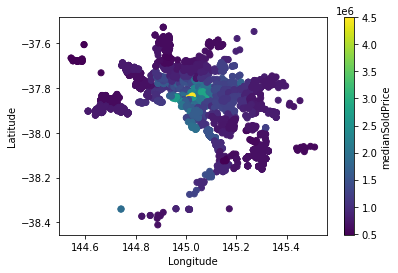

In [118]:
plt.scatter(school_complete['Longitude'], school_complete['Latitude'], c=school_complete['medianSoldPrice'])
clb = plt.colorbar()
plt.xlabel("Longitude")
plt.ylabel("Latitude")
clb.set_label("medianSoldPrice")

In [28]:
#Configure gmaps
gmaps.configure(api_key=g_key)

In [37]:
# Store latitude and longitude in locations
locations = school_complete[["Latitude", "Longitude"]]

# Fill NaN values and convert to float
medianSoldPrice = combined_shool_count["School count"]

In [132]:
# Plot Heatmap
fig = gmaps.figure(center=(-37.787746,144.883372), zoom_level=8.5)

# Create heat layer
heat_layer = gmaps.heatmap_layer(locations, weights=medianSoldPrice, 
                                max_intensity=100,
                                 dissipating=True,
                                 point_radius=10,)


# Add layer
fig.add_layer(heat_layer)

# Display figure
fig

Figure(layout=FigureLayout(height='420px'))

In [119]:
school_complete.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2308 entries, 0 to 2307
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Postcode          2308 non-null   int64  
 1   School count      2308 non-null   int64  
 2   Education sector  2308 non-null   object 
 3   School number     2308 non-null   int64  
 4   Name              2308 non-null   object 
 5   Longitude         2308 non-null   float64
 6   Latitude          2308 non-null   float64
 7   medianSoldPrice   2308 non-null   float64
 8   numberSold        2308 non-null   float64
dtypes: float64(4), int64(3), object(2)
memory usage: 180.3+ KB


In [121]:
#save complate dataframe to csv
school_complete.to_csv('Resources/school_complete_list.csv',encoding='utf-8',index=False,header=True)

In [125]:
# Set a dataframe for top 10 private and public shools.
# srouce: https://bettereducation.com.au/results/vcePublicSchoolResults.aspx
Top_shools = ['5','385','391','554','1021','1258','1267','1322','2009','2019','7384','7550','7635','8025','8125','8135','8819','8856','8865','8866']
Top_shools_df = combined_shool_count_clean[combined_shool_count_clean['School number'].isin(Top_shools)]
Top_shools_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24 entries, 363 to 1914
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Postcode          24 non-null     int64  
 1   School count      24 non-null     int64  
 2   Education sector  24 non-null     object 
 3   School number     24 non-null     int64  
 4   Name              24 non-null     object 
 5   LGA_PID           24 non-null     object 
 6   LGA_Name          24 non-null     object 
 7   Longitude         24 non-null     float64
 8   Latitude          24 non-null     float64
 9   medianSoldPrice   24 non-null     float64
 10  numberSold        24 non-null     float64
dtypes: float64(4), int64(3), object(4)
memory usage: 2.2+ KB


In [133]:
# set school name to a list
School_names=Top_shools_df['Name'].tolist()
# set the infor box template
info_box_template = """
<dl>
<dt>Shool Name</dt><dd>{Name}</dd>
<dt>Type</dt><dd>{Education sector}</dd>
<dt>Suberbs</dt><dd>{LGA_Name}</dd>
</dl>
"""
# Store the DataFrame Row
School_info = [info_box_template.format(**row) for index, row in Top_shools_df.iterrows()]
marker_locations = Top_shools_df[['Latitude', 'Longitude']]
fig = gmaps.figure(center=(-37.787746,144.883372), zoom_level=8.5)
markers = gmaps.marker_layer(marker_locations,
    info_box_content=School_info)

# Add marker layer ontop of heat map
fig.add_layer(markers)
fig.add_layer(heat_layer)
# Display figure
fig

Figure(layout=FigureLayout(height='420px'))